## 1 - Import packages


**Exercise**: Please mount your Google drive, and set up your working folder here.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# start your code here
os.chdir("/content/drive/MyDrive/FSU Courses/Spring2022/DL/Homework6") # change your working folder here

# end your code here

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(123)
tf.random.set_seed(123)



# 2 - Problem statement: SIGNS Dataset

One afternoon, with some friends we decided to teach our computers to decipher sign language. We spent a few hours taking pictures in front of a white wall and came up with the following dataset. It's now your job to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

Here are examples for each number, and how an explanation of how we represent the labels. These are the original pictures, before we lowered the image resolutoion to 64 by 64 pixels.
<figure>
<center>
<img src='https://drive.google.com/uc?id=1Nuox7mBJMGQt_QXZxmYGkXFEO5mjPf-B' />
<figcaption>Image Caption</figcaption></center>
</figure>


Run the following code to load the dataset.

In [ ]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Change the index below and run the cell to visualize some examples in the dataset.

y = 1


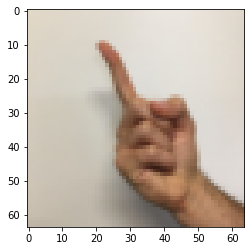

In [ ]:
# Example of a picture
index = 11
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

# 3. Using One Hot encodings

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then you might have the following y vector which you will need to convert as follows:
<figure>
<center>
<img src='https://drive.google.com/uc?id=1P02l9Fu2flQp0gsRl2bTAm0bsZ2cIMWI' />
<figcaption>
</figure>



This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). In tensorflow, we can tranform the labels of samples to one hot vectors by calling

```
tf.keras.utils.to_categorical(y)
```
Please transform the lables (or the output of the dataset) to one hot vectors.
 

As usual you flatten the image dataset, then normalize it by dividing by 255. On top of that, you will convert each label to a one-hot vector . Run the cell below to do so.

In [ ]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Flatten the training and test labels
Y_train_flatten=Y_train_orig.flatten()
Y_test_flatten=Y_test_orig.flatten()

# Convert training labels (Y_train_flatten) and test labels (Y_test_flatten) to one hot matrices\
### START CODE HERE ###'
Y_train = tf.keras.utils.to_categorical(Y_train_flatten)
Y_test =tf.keras.utils.to_categorical(Y_test_flatten)
### END CODE HERE ###

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 12288
number of test examples = 12288
X_train shape: (1080, 12288)
Y_train shape: (1080, 6)
X_test shape: (120, 12288)
Y_test shape: (120, 6)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors. Please make sure all these shapes make sense to you before continuing.

#4.Building your model

**Your goal** is to build an model capable of recognizing a sign with high accuracy. To do so, you are going to build a tensorflow model that is almost the same as one you have previously built for cat recognition and multi-class classification problems. If you already forget previous homeworks, please go back to review them to get some clues. 

**Previous related homeworks** 

"Planar_data_tensorflow.ipynb" in Homework 2

"deepNN_tensorflow.ipynb" in Homework 3

"regularized_deepNN_tensorflow.ipynb" in Homework 4

"batch-size-test-student-version.ipynb" In Homework 5

In [ ]:
### START CODE HERE ###
model=tf.keras.Sequential([
    #Input layer                      
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # Set how many elements are there in every training image?

    #Start adding hidden layers  
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.L2(0.001)), # Please set your neuron numbers, activation function and so on. 
    #please feel free to add more hidden layers here. 
    tf.keras.layers.Dense(80,activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Dense(60,activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(40,activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(20,activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    # End adding hidden layers 

    #output layer                   
    tf.keras.layers.Dense(Y_test.shape[1], activation='softmax') # Set how many elements are there in every training output
            
])
### END CODE HERE ###'
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1228900   
                                                                 
 dense_13 (Dense)            (None, 80)                8080      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_14 (Dense)            (None, 60)                4860      
                                                                 
 dropout_4 (Dropout)         (None, 60)                0         
                                                                 
 dense_15 (Dense)            (None, 40)                2440      
                                                                 
 dropout_5 (Dropout)         (None, 40)               

In [ ]:
### START CODE HERE ###'
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07),  # Optimizer please change "None" to some meaningful number here
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(), # loss. Please change 'None' to some meaningful loss
              # List of metrics to monitor
              metrics=['accuracy'],
                 )
### END CODE HERE ###'

In [ ]:
### START CODE HERE ###'
history = model.fit(
    X_train , #  training input data
    Y_train, # training output data
    batch_size=64, # how many samples (points) do you want to use to update weights once? 
    epochs=1000 # how many iterations do you want to train your model? Your data will be reused to train the model for the number of epochs. I trained 5 min for this model
)
### END CODE HERE ###'

Epoch 1/1000
17/17 [==============================] - 1s 7ms/step - loss: 1.0705 - accuracy: 0.1509
Epoch 2/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.9371 - accuracy: 0.1704
Epoch 3/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.8723 - accuracy: 0.1685
Epoch 4/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.8114 - accuracy: 0.1796
Epoch 5/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.7853 - accuracy: 0.1713
Epoch 6/1000
17/17 [==============================] - 0s 8ms/step - loss: 0.7514 - accuracy: 0.1870
Epoch 7/1000
17/17 [==============================] - 0s 8ms/step - loss: 0.7331 - accuracy: 0.1898
Epoch 8/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.7098 - accuracy: 0.2120
Epoch 9/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.2157
Epoch 10/1000
17/17 [==============================] - 0s 8ms/step - loss: 0.6637 - accuracy: 0.2287


**If the training works, congratulations! You have built a model for recognizing SIGN language.**

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.7833


[0.2763489782810211, 0.7833333611488342]

# 5. Grading rule

***Try your best to achieve high accuarcy.  The grade for this homework will based on your model final training accurracy and test accuracy. ***

For example, if your final training accurracy is 87.8 (consider one decimal) and test accuracy is 70.9, the total grade is 8.78 + 7.09 =15.87. The full credit is 10+10 =20.  It is hard to get full credit in this homework, please try your best.  





**Tips**

You can try to improve its accuracy by:
1. tuning the hyperparameters (learning rate, batch size, epoches and so on)
2. adjusting your layers numbers or nuron numbers.
3. changing optimizer or loss function
4. using dropout layer
5. add regularizers.L2
6. .....

Once again, here's a thumbs up for your work!

Populating the interactive namespace from numpy and matplotlib


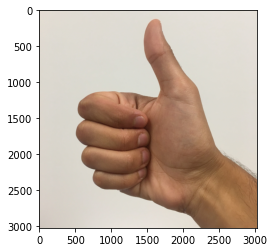

In [ ]:
%pylab inline
import matplotlib.image as mpimg
img = mpimg.imread('images/thumbs_up.jpg')
imgplot = plt.imshow(img)
plt.show()